# Loading Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import pyodbc

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# 1. | Loading and Cleaning data

1-1. | Loading data

In [2]:
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER=--;DATABASE=SSISRND;UID=--;PWD=--')
cursor = cnxn.cursor()

In [3]:
sql ="""SELECT so.[Order_No]
      ,so.[SalesOrderRowid]
      ,so.[Order_ID]
      ,so.[Unit_ID]
      ,so.[Sales_Organization_Name]
      ,so.[Order_date]
      ,so.[Customer_ID]
      ,so.[Item_ID]
      ,i.[Item_Name]
      ,i.[Base_UoM]
      ,i.[Item_Code]
      ,so.[Order_Qty]
      ,so.[Item_Price]
      ,so.[Currency]
      ,so.[Shippoint_ID]
      ,so.[Shippoint_Name]
      ,so.[Plant_Name]
      ,so.[Retailer_ID]
      ,so.[Retailer_Name]
      ,so.[Retailer_Address]
      ,so.[Retailer_ContactNo]
      ,so.[Transport_Rate]
      ,so.[Unit_Group_name]
  FROM [SSISRND].[o2c].[SalesOrderInformation] As so
  JOin [SSISRND].[dim].[ItemProfile] As i on i.Item_Id = so.Item_ID
  where so.[Unit_ID] = 144 and [Sales_Organization_Name]= 'LOCAL SALES'"""
soi = pd.read_sql(sql,cnxn)

In [5]:
df = soi[['Order_ID','Item_ID','Item_Name','Order_Qty','Order_date','Item_Price','Customer_ID']]
df['Order_Value'] = df['Item_Price']*df['Order_Qty']
df.head()

,Order_ID,Item_ID,Item_Name,Order_Qty,Order_date,Item_Price,Customer_ID,Order_Value
0,451986,128818,Salt Iodized 50 kg,240.0,2022-11-06 00:00:00.0000000,1450.0,74529,348000.0
1,570039,128818,Salt Iodized 50 kg,23.0,2023-05-21 00:00:00.0000000,7.0,70373,161.0
2,629599,170686,Katari Atop New 50 kg (T),5.0,2023-09-21 00:00:00.0000000,1660.0,88040,8300.0
3,601756,170686,Katari Atop New 50 kg (T),30.0,2023-07-20 00:00:00.0000000,3380.0,73445,101400.0
4,603469,170686,Katari Atop New 50 kg (T),2.0,2023-07-25 00:00:00.0000000,3216.0,73415,6432.0


In [6]:
df.shape

(121783, 8)

1-2. | Dropping data with negative or zero quantity

In [7]:
df=df.loc[df['Order_Qty']>0]

In [8]:
df.shape

(117646, 8)

1-3. | Dropping data with zero price

In [9]:
df=df.loc[df['Item_Price']>0]

In [10]:
df.shape

(110876, 8)

In [12]:
df.head()

,Order_ID,Item_ID,Item_Name,Order_Qty,Order_date,Item_Price,Customer_ID,Order_Value
0,451986,128818,Salt Iodized 50 kg,240.0,2022-11-06 00:00:00.0000000,1450.0,74529,348000.0
1,570039,128818,Salt Iodized 50 kg,23.0,2023-05-21 00:00:00.0000000,7.0,70373,161.0
2,629599,170686,Katari Atop New 50 kg (T),5.0,2023-09-21 00:00:00.0000000,1660.0,88040,8300.0
3,601756,170686,Katari Atop New 50 kg (T),30.0,2023-07-20 00:00:00.0000000,3380.0,73445,101400.0
4,603469,170686,Katari Atop New 50 kg (T),2.0,2023-07-25 00:00:00.0000000,3216.0,73415,6432.0


1-4. | Null value Observation

In [15]:
# Null Data Checking
df.isnull().sum()

Order_ID       0
Item_ID        0
Item_Name      0
Order_Qty      0
Order_date     0
Item_Price     0
Customer_ID    0
Order_Value    0
dtype: int64

1-5. | Adding Year and Month Column

In [16]:
df['Order_date'] = pd.to_datetime(df['Order_date'])
df['Year']=df['Order_date'].dt.year
df['Month']=df['Order_date'].dt.month
df.head()

,Order_ID,Item_ID,Item_Name,Order_Qty,Order_date,Item_Price,Customer_ID,Order_Value,Year,Month
0,451986,128818,Salt Iodized 50 kg,240.0,2022-11-06,1450.0,74529,348000.0,2022,11
1,570039,128818,Salt Iodized 50 kg,23.0,2023-05-21,7.0,70373,161.0,2023,5
2,629599,170686,Katari Atop New 50 kg (T),5.0,2023-09-21,1660.0,88040,8300.0,2023,9
3,601756,170686,Katari Atop New 50 kg (T),30.0,2023-07-20,3380.0,73445,101400.0,2023,7
4,603469,170686,Katari Atop New 50 kg (T),2.0,2023-07-25,3216.0,73415,6432.0,2023,7


1-6. | Checking the Total Order Value in each month.

In [17]:
df.groupby(['Year','Month'])['Order_Value'].sum()

Year  Month
2022  3        1.621655e+09
      4        1.600870e+09
      5        1.837949e+09
      6        2.328223e+09
      7        1.615141e+09
      8        1.863025e+09
      9        1.914956e+09
      10       2.529164e+09
      11       2.156049e+09
      12       1.666527e+09
2023  1        2.804405e+09
      2        1.748163e+09
      3        1.757094e+09
      4        2.998547e+09
      5        2.597337e+09
      6        1.995422e+09
      7        2.931360e+09
      8        4.863359e+09
      9        4.447029e+09
      10       4.211737e+09
      11       3.848929e+09
      12       3.315641e+09
2024  1        2.509286e+09
      2        1.018099e+09
Name: Order_Value, dtype: float64

In [18]:
df1=df.copy()

In [19]:
df1.head()

,Order_ID,Item_ID,Item_Name,Order_Qty,Order_date,Item_Price,Customer_ID,Order_Value,Year,Month
0,451986,128818,Salt Iodized 50 kg,240.0,2022-11-06,1450.0,74529,348000.0,2022,11
1,570039,128818,Salt Iodized 50 kg,23.0,2023-05-21,7.0,70373,161.0,2023,5
2,629599,170686,Katari Atop New 50 kg (T),5.0,2023-09-21,1660.0,88040,8300.0,2023,9
3,601756,170686,Katari Atop New 50 kg (T),30.0,2023-07-20,3380.0,73445,101400.0,2023,7
4,603469,170686,Katari Atop New 50 kg (T),2.0,2023-07-25,3216.0,73415,6432.0,2023,7


# 2. | Exploratoty Data Analysis

2-1. | Orderd amount and Order quantity

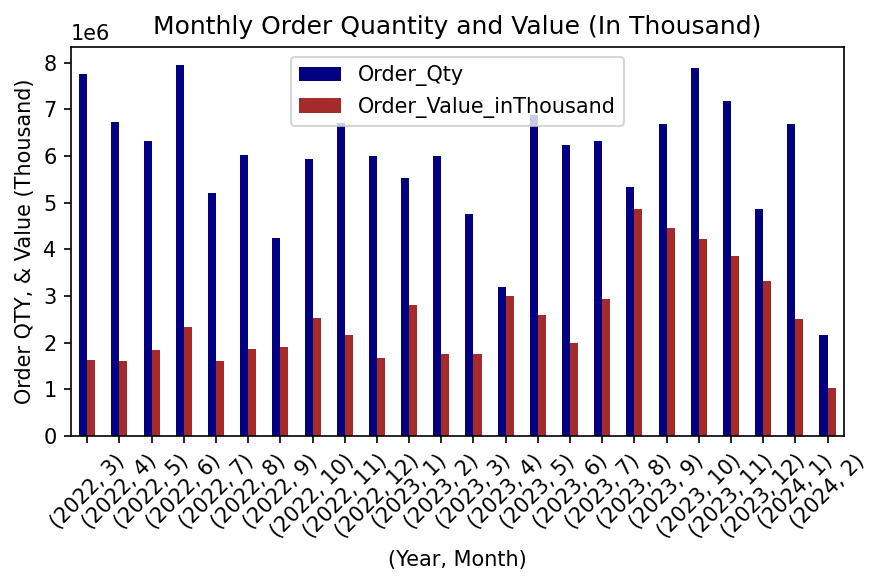

In [20]:
# Grouping data and processing
Order = df1.groupby(['Year','Month']).agg({
    'Order_Value':'sum',
    'Order_Qty': 'sum'
}).reset_index()
Order['Order_Value_inThousand'] = Order['Order_Value'] / 1000
Order.to_csv('Order.csv')
Order = pd.read_csv('Order.csv')
Order = Order.pivot_table(Order, index=['Year', 'Month'], aggfunc=np.sum, fill_value=0)
Order = Order[['Order_Qty', 'Order_Value_inThousand']]

# Plotting
fig, ax = plt.subplots(figsize=(6, 4), dpi=150)  # Adjust figure size as needed
colors = ['#000080', '#A52A2A']  # Custom color for bars
Order.plot(kind='bar', color=colors, ax=ax)
plt.title('Monthly Order Quantity and Value (In Thousand)')
plt.xlabel('(Year, Month)')
plt.ylabel('Order QTY, & Value (Thousand)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


2-2. | Category

Top 10 highest order amount items

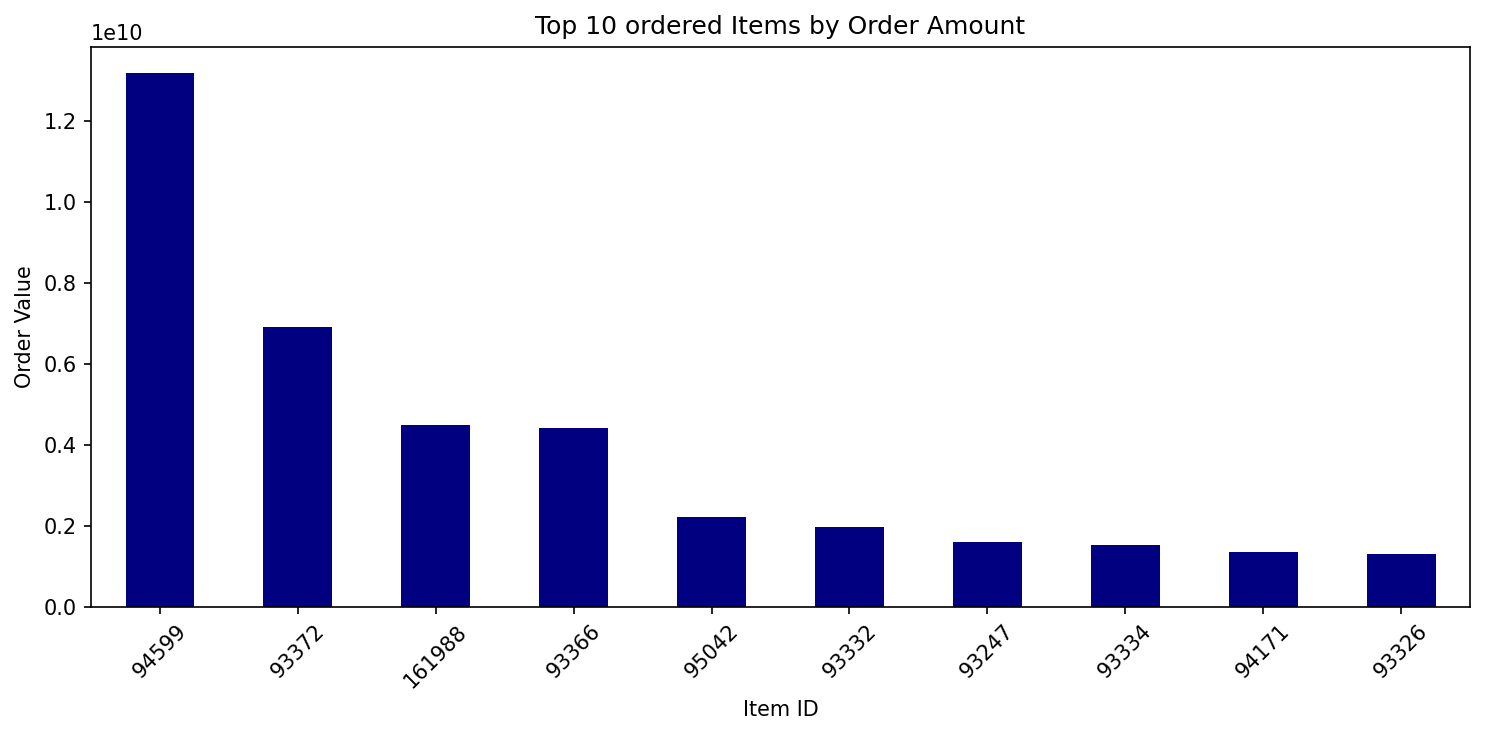

In [21]:
item_Order = df1.groupby('Item_ID')['Order_Value'].sum().sort_values(ascending=False)[:10]

# Plotting
fig, ax = plt.subplots(figsize=(10,5), dpi=150)  # Adjust figure size as needed
colors = ['#000080']  # Custom color for bars
item_Order.plot(kind='bar', color=colors, ax=ax)
plt.title('Top 10 ordered Items by Order Amount')
plt.xlabel('Item ID')
plt.ylabel('Order Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

Top 10 order Item by order Quantity

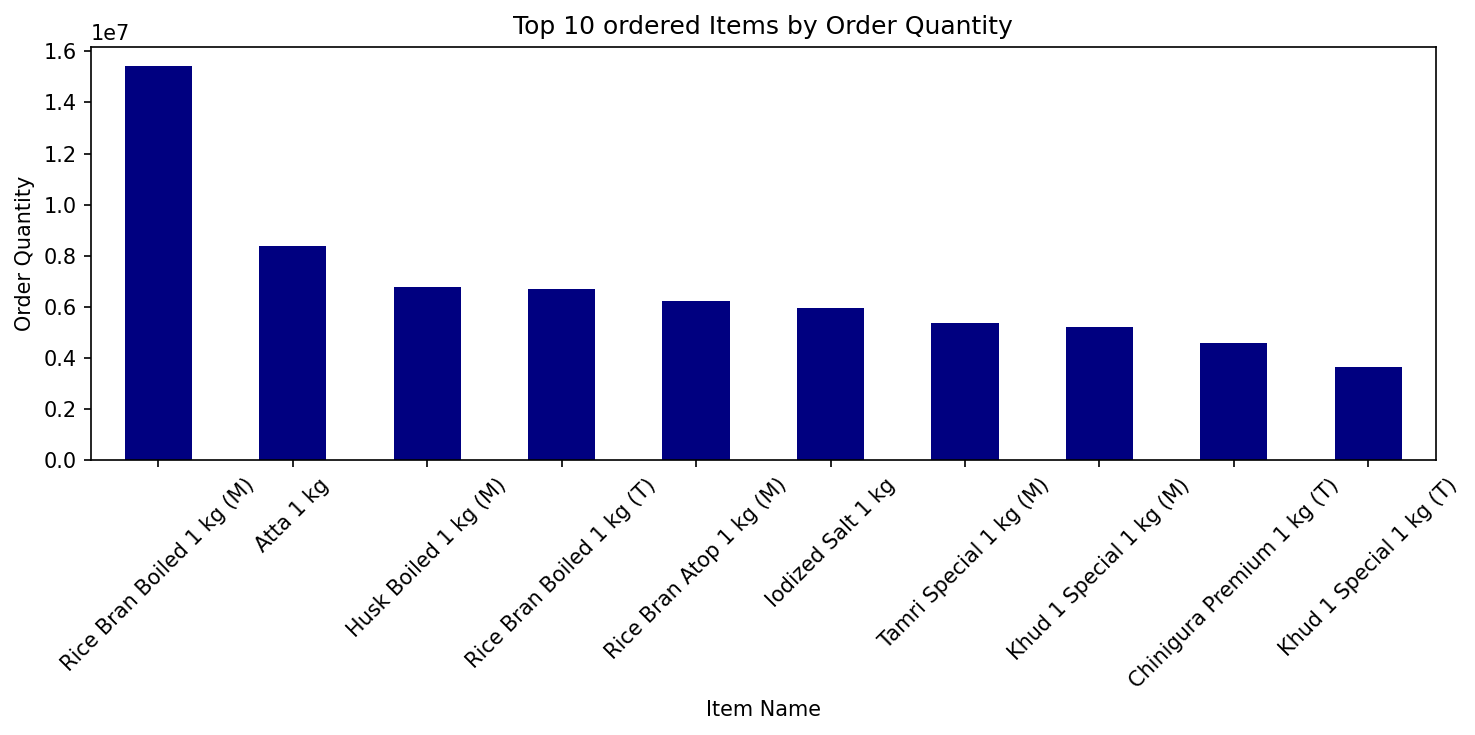

In [22]:
item_Order = df1.groupby(['Item_ID', 'Item_Name'])['Order_Qty'].sum().sort_values(ascending=False)[:10]

item_names = [item[1] for item in item_Order.index]
# Plotting
fig, ax = plt.subplots(figsize=(10, 5), dpi=150)  # Adjust figure size as needed
colors = ['#000080']  # Custom color for bars
item_Order.plot(kind='bar', color=colors, ax=ax)
plt.title('Top 10 ordered Items by Order Quantity')
plt.xlabel('Item Name')  # Change xlabel to Item Name
plt.ylabel('Order Quantity')
plt.xticks(range(len(item_names)), item_names, rotation=45)  # Use item_names for x-axis labels
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

Top 10 most frequently purchased items

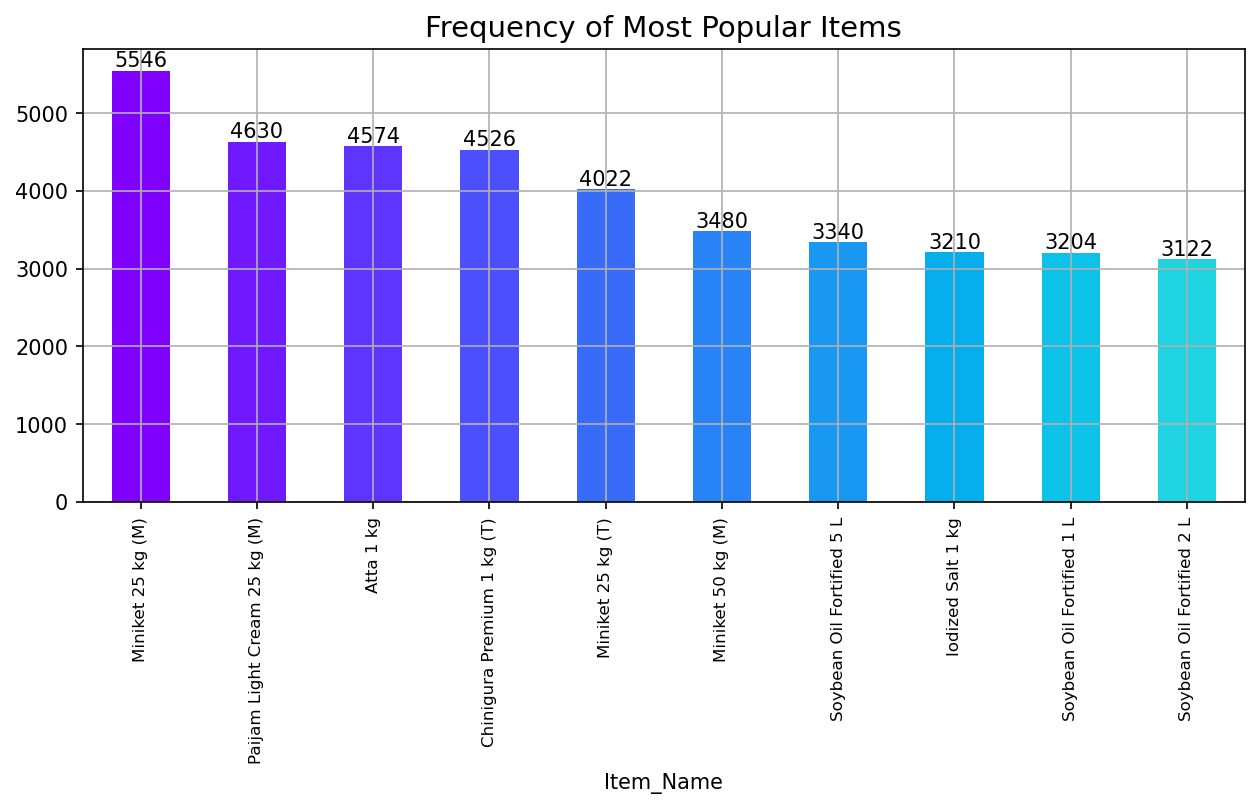

In [23]:
color = plt.cm.rainbow(np.linspace(0, 1, 30))
# Plotting
plt.figure(figsize=(10, 4), dpi=150)  # Adjust figure size as needed
ax = df1['Item_Name'].value_counts().head(10).plot.bar(color=color)
plt.title('Frequency of Most Popular Items', fontsize=14)
plt.xticks(rotation=90, fontsize=8)
plt.grid()
# Adding data labels
for i, v in enumerate(df1['Item_Name'].value_counts().head(10)):
    ax.text(i, v + 0.2, str(v), ha='center', va='bottom')

plt.show()

# 3. | Market Basket Analysis

3-1. | Implementing Apriori

In [24]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [25]:
df1['Item_Name']=df['Item_Name'].str.strip()
df1['Order_ID']=df['Order_ID'].astype('str')

In [26]:
basket=df1.groupby(['Order_ID','Item_Name'])['Order_Qty'].sum().unstack().reset_index().fillna(0).set_index('Order_ID')

In [27]:
basket.head()

Item_Name,Atash 25 kg (M),Atash 25 kg (T),Atash 50 kg (M),Atash 50 kg (T),Atash Atop 25 kg (T),Atta 1 kg,Atta 2 kg,Atta 50 kg,Balam 25 kg (T),Banglamoti 25 kg (M),...,Wheat Canada 1 kg,Wheat Canada 1000 kg,Wheat Canada 90 kg,Wheat Russia 1 kg,Wheat Russia 1000 kg,White flatted rice 50 kg,Whole Gorom Masala 100 gm (T),Yellow Peas 10 kg,Yellow Peas 1000 KG,khud 3 Katari Atop 1 kg (M)
Order_ID,,,,,,,,,,,,,,,,,,,,,
349120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
349243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2400.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
349250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
349281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
349286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
def encode_units(x):
  if x<=0:
    return 0
  if x>=1:
    return 1

In [29]:
basket_sets=basket.applymap(encode_units)

In [30]:
basket_sets.head(3)

Item_Name,Atash 25 kg (M),Atash 25 kg (T),Atash 50 kg (M),Atash 50 kg (T),Atash Atop 25 kg (T),Atta 1 kg,Atta 2 kg,Atta 50 kg,Balam 25 kg (T),Banglamoti 25 kg (M),...,Wheat Canada 1 kg,Wheat Canada 1000 kg,Wheat Canada 90 kg,Wheat Russia 1 kg,Wheat Russia 1000 kg,White flatted rice 50 kg,Whole Gorom Masala 100 gm (T),Yellow Peas 10 kg,Yellow Peas 1000 KG,khud 3 Katari Atop 1 kg (M)
Order_ID,,,,,,,,,,,,,,,,,,,,,
349120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
349243,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
349250,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
basket_sets.shape

(28217, 267)

In [32]:
basket_sets.isnull().sum()

Item_Name
Atash 25 kg (M)                  0
Atash 25 kg (T)                  0
Atash 50 kg (M)                  0
Atash 50 kg (T)                  0
Atash Atop 25 kg (T)             0
                                ..
White flatted rice 50 kg         0
Whole Gorom Masala 100 gm (T)    0
Yellow Peas 10 kg                0
Yellow Peas 1000 KG              0
khud 3 Katari Atop 1 kg (M)      0
Length: 267, dtype: int64

In [33]:
basket_sets.dropna(inplace=True)

In [34]:
frequent_itemsets=apriori(basket_sets,min_support=0.02,use_colnames=True)

C:\Users\motiur\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [35]:
rules=round(association_rules(frequent_itemsets,metric='lift',min_threshold=1),2)
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Atta 2 kg),(Atta 1 kg),0.04,0.08,0.03,0.66,8.14,0.03,2.69,0.92
1,(Atta 1 kg),(Atta 2 kg),0.08,0.04,0.03,0.36,8.14,0.03,1.49,0.95
2,(Atta 1 kg),(Chinigura Premium 1 kg (T)),0.08,0.08,0.02,0.28,3.47,0.02,1.28,0.77
3,(Chinigura Premium 1 kg (T)),(Atta 1 kg),0.08,0.08,0.02,0.28,3.47,0.02,1.28,0.77
4,(Maida 1 kg),(Atta 1 kg),0.04,0.08,0.03,0.70,8.63,0.02,3.05,0.92


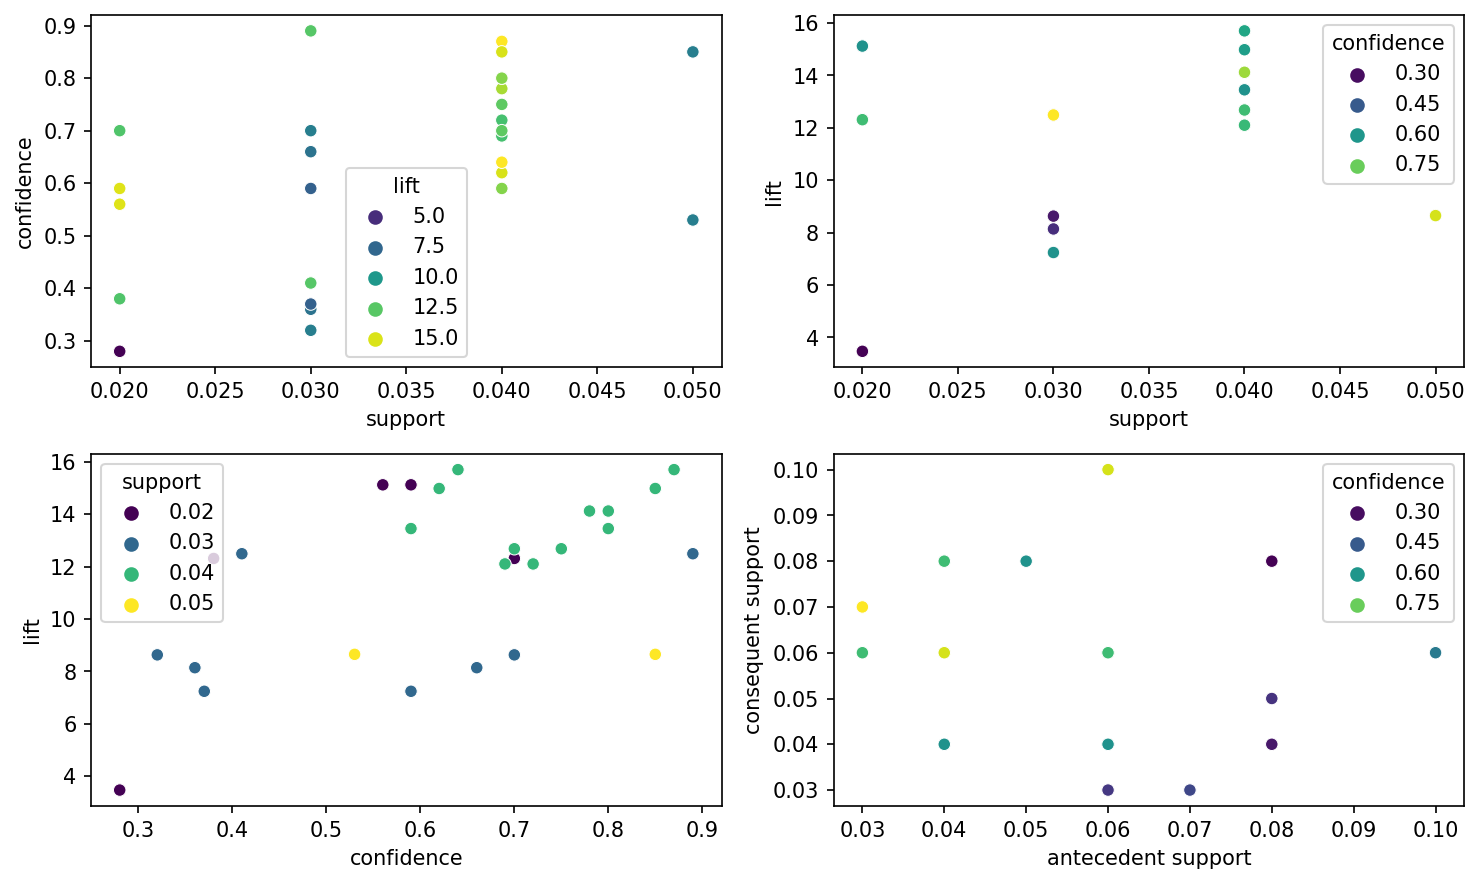

In [36]:
plt.figure(figsize=(10,6),dpi=150)
plt.subplot(221)
sns.scatterplot(x="support",y="confidence",data=rules,hue="lift",palette="viridis")
plt.subplot(222)
sns.scatterplot(x="support",y="lift",data=rules,hue="confidence",palette="viridis")
plt.subplot(223)
sns.scatterplot(x="confidence",y="lift",data=rules,hue='support',palette="viridis")
plt.subplot(224)
sns.scatterplot(x="antecedent support",y="consequent support",data=rules,hue='confidence',palette="viridis")
plt.tight_layout()
plt.show()

In [37]:
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [38]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges from association rules
for idx, row in rules.iterrows():
    G.add_node(tuple(row['antecedents']), color='skyblue')
    G.add_node(tuple(row['consequents']), color='orange')
    G.add_edge(tuple(row['antecedents']), tuple(row['consequents']), weight=row['support'])

# Set node positions using a spring layout
pos = nx.spring_layout(G)

# Create an interactive plot using plotly
edge_x = []
edge_y = []
for edge in G.edges(data=True):
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        )
    )
)

# Customize the layout
layout = go.Layout(
    showlegend=False,
    hovermode='closest',
    margin=dict(b=0, l=0, r=0, t=0),
)

# Create the figure
fig = go.Figure(data=[edge_trace, node_trace], layout=layout)

# Show the interactive graph
fig.show()

3-2. | The top 5 of the highest support value of items(antecedents)

In [39]:
rules[['antecedents','consequents','support']].sort_values('support',ascending=False)[:5]

,antecedents,consequents,support
10,(Miniket 25 kg (M)),(Miniket 50 kg (M)),0.05
11,(Miniket 50 kg (M)),(Miniket 25 kg (M)),0.05
27,(Soybean Oil Fortified 5 L),"(Soybean Oil Fortified 1 L, Soybean Oil Fortif...",0.04
26,(Soybean Oil Fortified 2 L),"(Soybean Oil Fortified 1 L, Soybean Oil Fortif...",0.04
25,(Soybean Oil Fortified 1 L),"(Soybean Oil Fortified 2 L, Soybean Oil Fortif...",0.04


3-3. | The top 5 of the highest confidence value of items

In [40]:
rules[['antecedents','consequents','confidence']].sort_values('confidence',ascending=False)[:5]

,antecedents,consequents,confidence
13,(Miniket 50 kg (T)),(Miniket 25 kg (T)),0.89
23,"(Soybean Oil Fortified 1 L, Soybean Oil Fortif...",(Soybean Oil Fortified 2 L),0.87
24,"(Soybean Oil Fortified 2 L, Soybean Oil Fortif...",(Soybean Oil Fortified 1 L),0.85
11,(Miniket 50 kg (M)),(Miniket 25 kg (M)),0.85
22,"(Soybean Oil Fortified 1 L, Soybean Oil Fortif...",(Soybean Oil Fortified 5 L),0.80


3-4. | The top 5 of the highest lift value of items

In [41]:
rules[['antecedents','consequents','lift']].sort_values('lift',ascending=False)[:10]

,antecedents,consequents,lift
26,(Soybean Oil Fortified 2 L),"(Soybean Oil Fortified 1 L, Soybean Oil Fortif...",15.70
23,"(Soybean Oil Fortified 1 L, Soybean Oil Fortif...",(Soybean Oil Fortified 2 L),15.70
8,(Miniket 5 kg (T)),(Katari Najir 5 kg (T)),15.12
9,(Katari Najir 5 kg (T)),(Miniket 5 kg (T)),15.12
25,(Soybean Oil Fortified 1 L),"(Soybean Oil Fortified 2 L, Soybean Oil Fortif...",14.98
24,"(Soybean Oil Fortified 2 L, Soybean Oil Fortif...",(Soybean Oil Fortified 1 L),14.98
17,(Soybean Oil Fortified 2 L),(Soybean Oil Fortified 1 L),14.12
16,(Soybean Oil Fortified 1 L),(Soybean Oil Fortified 2 L),14.12
27,(Soybean Oil Fortified 5 L),"(Soybean Oil Fortified 1 L, Soybean Oil Fortif...",13.45
22,"(Soybean Oil Fortified 1 L, Soybean Oil Fortif...",(Soybean Oil Fortified 5 L),13.45


3-5. | The best combination of the items

In [45]:
freq_com_set = rules[(rules['lift']>=12)&(rules['confidence']>=0.7)].sort_values('lift',ascending=False)
freq_com_set

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
23,"(Soybean Oil Fortified 1 L, Soybean Oil Fortif...",(Soybean Oil Fortified 2 L),0.04,0.06,0.04,0.87,15.70,0.03,7.07,0.98
24,"(Soybean Oil Fortified 2 L, Soybean Oil Fortif...",(Soybean Oil Fortified 1 L),0.04,0.06,0.04,0.85,14.98,0.03,6.26,0.97
16,(Soybean Oil Fortified 1 L),(Soybean Oil Fortified 2 L),0.06,0.06,0.04,0.78,14.12,0.04,4.28,0.99
17,(Soybean Oil Fortified 2 L),(Soybean Oil Fortified 1 L),0.06,0.06,0.04,0.80,14.12,0.04,4.74,0.98
22,"(Soybean Oil Fortified 1 L, Soybean Oil Fortif...",(Soybean Oil Fortified 5 L),0.04,0.06,0.04,0.80,13.45,0.03,4.60,0.97
20,(Soybean Oil Fortified 2 L),(Soybean Oil Fortified 5 L),0.06,0.06,0.04,0.75,12.68,0.04,3.77,0.97
21,(Soybean Oil Fortified 5 L),(Soybean Oil Fortified 2 L),0.06,0.06,0.04,0.70,12.68,0.04,3.15,0.98
13,(Miniket 50 kg (T)),(Miniket 25 kg (T)),0.03,0.07,0.03,0.89,12.49,0.03,8.44,0.95
7,(Iodized Salt 500gm),(Iodized Salt 1 kg),0.03,0.06,0.02,0.70,12.31,0.02,3.13,0.95
18,(Soybean Oil Fortified 1 L),(Soybean Oil Fortified 5 L),0.06,0.06,0.04,0.72,12.10,0.04,3.31,0.97


In [43]:
freq_com_set.to_excel(r'C:\Users\motiur\Desktop\freq_com_set.xlsx', index=False)

# Conclusion

The Most Orderd Item Is:  Ricr Bran Boiled 1K (T)

The Most frequent Item is : Miniket 25K (T)

The Most frequent Item Set is :Soybean Oil Fortified 1L , Soybean Oil Fortified 5L and Soybean Oil Fortified 2L